From the Overview section,

"The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar."30% used in testing and 70% in training.

Overview of Data

Labels

So what exactly are stars, galaxies, and quasars? Had you asked me prior to starting this project, I would’ve not been able to answer (shame on me). Fortunately, Faraz’s notebook succinctly summarises what they are:

A GALAXY is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. Galaxies are categorised according to their visual morphology as elliptical, spiral, or irregular. Many galaxies are thought to have supermassive black holes at their active centers.

A STAR is a type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.

A QUASAR, also known as quasi-stellar object, is an extremely luminous active galactic nucleus (AGN). The power radiated by quasars is enormous. The most powerful quasars have luminosities exceeding 1041 watts, thousands of times greater than an ordinary large galaxy such as the Milky Way.

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [44]:
data = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [45]:
data.shape

(10000, 18)

The object id columns, they are of no use in the analysis so we will delete them from dataset


In [46]:
# drop the object id columns, they are of no use in the analysis
data.drop(['objid','specobjid'], axis=1, inplace=True)

In [47]:
data.shape

(10000, 16)

In [48]:
data.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
rerun       0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

In [49]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


<AxesSubplot:xlabel='class', ylabel='count'>

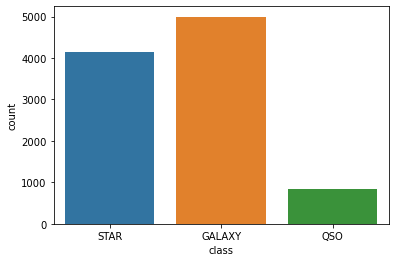

In [51]:
sns.countplot(x=data['class'])

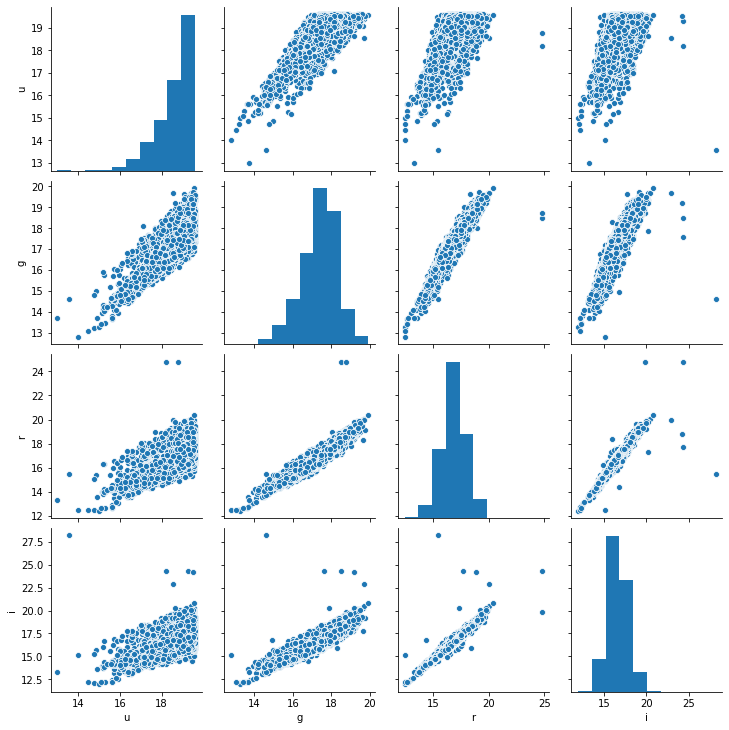

In [52]:
sns.pairplot(data[['u','g','r','i','class']])

f:\python-3.6\lib\site-packages\seaborn\categorical.py:2613: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


Text(0.5, 1.0, 'dec')

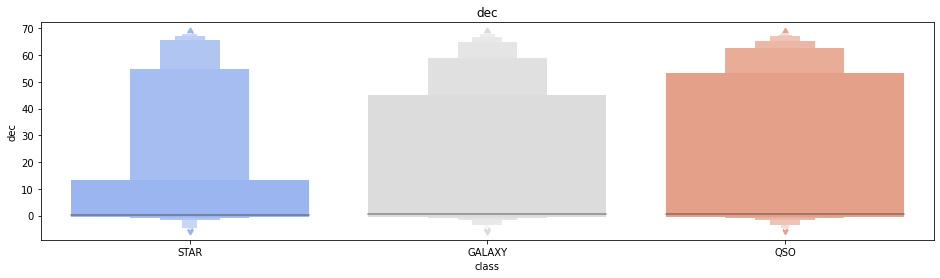

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 4))
ax = sns.lvplot(x=data['class'], y=data['dec'], palette='coolwarm')
ax.set_title('dec')

Text(0.5, 1.0, 'Galaxy')

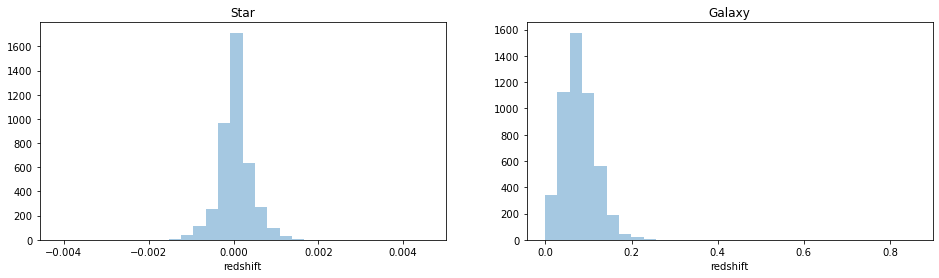

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
ax = sns.distplot(data[data['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(data[data['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')

<AxesSubplot:>

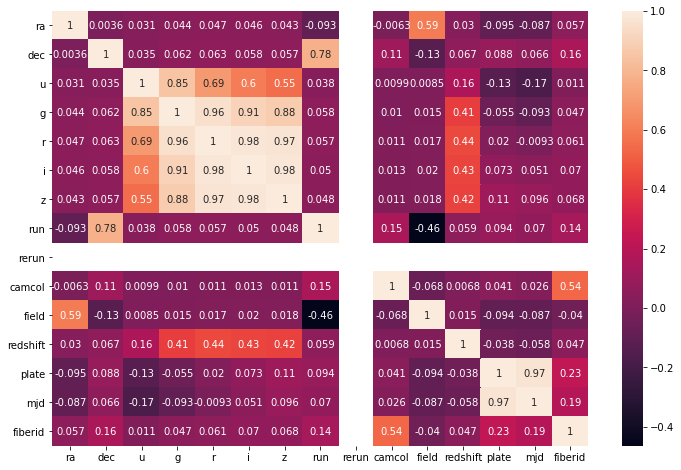

In [55]:
f, ax = plt.subplots(1, figsize=(12,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [56]:
data.drop('rerun',axis=1,inplace=True)

The Target from data is Data classification to Star,Galaxy or Quasar,so the class column has 3 Categories and in this case we need to convert them into numeric data.

In [57]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   camcol    10000 non-null  int64  
 9   field     10000 non-null  int64  
 10  class     10000 non-null  int32  
 11  redshift  10000 non-null  float64
 12  plate     10000 non-null  int64  
 13  mjd       10000 non-null  int64  
 14  fiberid   10000 non-null  int64  
dtypes: float64(8), int32(1), int64(6)
memory usage: 1.1 MB


In [59]:
X = data.drop('class', axis=1)
y = data['class']

#### Data Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

In [62]:
# Decision Tree Classifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

In [63]:
dtClassifer.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15)

In [64]:
y_preds = dtClassifer.predict(X_test)

In [65]:
print(y_preds[:10],'\n',y_test[:10])

[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int32


In [66]:
print('accuracy_score by Decision Tree Classifier:',accuracy_score(y_true=y_test, y_pred=y_preds))

accuracy_score by Decision Tree Classifier: 0.99


In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)
print('Confusion matrix\n\n',cm)


Confusion matrix

 [[1486    6    5]
 [  16  249    1]
 [   2    0 1235]]


Text(42.0, 0.5, 'truth')

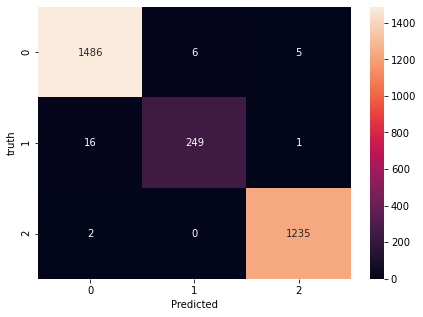

In [68]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')